# Netflix - Movies & TV Shows
#### Christina Song

#### Dataset: https://www.kaggle.com/datasets/victorsoeiro/netflix-tv-shows-and-movies

This data set was created to list all shows available on Netflix streaming, and analyze the data to find interesting facts. This data was acquired in July 2022 containing data available in the United States.

### Questions to answer:

How can we create a ranking of shows based on imdb and tmdb scores?

What are the best predictors of a highly ranked movie/tv-show?

How can we define content diversity across the Netflix platform and identify any gaps in content offering?

## Data Dictionary

### Titles Table
There are +5K unique titles on Netflix. 

|   Variable   |  Description  |
| :----------- | :------------ |
| id | title ID on JustWatch |
| title | name of the title |
| show_type | TV show or movie |
| description | a brief description |
| release_year | the release year |
| age_certification | the age certification |
| runtime | the length of the episode (show) or movie |
| genres | a list of genres |
| production_countries | a list of countries that produced the title |
| seasons | Number of seasons if it's a SHOW |
| imdb_id | the title ID on IMDB |
| imdb_votes | Votes on IMDB |
| tmdb_popularity | popularity on TMDB |
| tmdb_score | Score on TMDB |

### Credits Table
There are +77k credits of actors and directors on Netflix titles. 

|   Variable   |  Description  |
| :----------- | :------------ |
| person_ID | The person ID on JustWatch |
| id | The title ID on JustWatch |
| name | The actor or director's name |
| character_name | The character name |
| role | ACTOR or DIRECTOR |


In [1]:
# Loading libraries

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

## Movies & TV Shows

In [2]:
# Loading the title dataset

film = pd.read_csv('../netflix/archive/titles.csv')
film.head()

,id,title,type,description,release_year,age_certification,runtime,genres,production_countries,seasons,imdb_id,imdb_score,imdb_votes,tmdb_popularity,tmdb_score
0,ts300399,Five Came Back: The Reference Films,SHOW,This collection includes 12 World War II-era p...,1945,TV-MA,51,['documentation'],['US'],1.0,NaN,NaN,NaN,0.600,NaN
1,tm84618,Taxi Driver,MOVIE,A mentally unstable Vietnam War veteran works ...,1976,R,114,"['drama', 'crime']",['US'],NaN,tt0075314,8.2,808582.0,40.965,8.179
2,tm154986,Deliverance,MOVIE,Intent on seeing the Cahulawassee River before...,1972,R,109,"['drama', 'action', 'thriller', 'european']",['US'],NaN,tt0068473,7.7,107673.0,10.010,7.300
3,tm127384,Monty Python and the Holy Grail,MOVIE,"King Arthur, accompanied by his squire, recrui...",1975,PG,91,"['fantasy', 'action', 'comedy']",['GB'],NaN,tt0071853,8.2,534486.0,15.461,7.811
4,tm120801,The Dirty Dozen,MOVIE,12 American military prisoners in World War II...,1967,NaN,150,"['war', 'action']","['GB', 'US']",NaN,tt0061578,7.7,72662.0,20.398,7.600


In [3]:
# Checking the shape of the table

film.shape

(5850, 15)

In [4]:
# Checking for null values and datatypes of each variable. 

film.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5850 entries, 0 to 5849
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    5850 non-null   object 
 1   title                 5849 non-null   object 
 2   type                  5850 non-null   object 
 3   description           5832 non-null   object 
 4   release_year          5850 non-null   int64  
 5   age_certification     3231 non-null   object 
 6   runtime               5850 non-null   int64  
 7   genres                5850 non-null   object 
 8   production_countries  5850 non-null   object 
 9   seasons               2106 non-null   float64
 10  imdb_id               5447 non-null   object 
 11  imdb_score            5368 non-null   float64
 12  imdb_votes            5352 non-null   float64
 13  tmdb_popularity       5759 non-null   float64
 14  tmdb_score            5539 non-null   float64
dtypes: float64(5), int64(

There is one title value missing. 

The seasons column is only for SHOWS so we can drop the seasons column when splitting the table for movies. 

Not all movies of tv shows are associated with imdb and/or tmdb for rating information. 

### Let's separate Movies and TV shows to run separate analyses.

### Cleaning Data

#### Let's drop nulls for score and population scores. 

In [5]:
# Since there are small number of null values for title and description, let's just drop them as it won't make a big difference in the whole dataset. 

film_clean = film.dropna(subset=['title', 'description'])
film_clean.isnull().sum()

id                         0
title                      0
type                       0
description                0
release_year               0
age_certification       2611
runtime                    0
genres                     0
production_countries       0
seasons                 3735
imdb_id                  392
imdb_score               469
imdb_votes               484
tmdb_popularity           85
tmdb_score               301
dtype: int64

In [6]:
film_clean = film.dropna(subset=['imdb_id','imdb_score','imdb_votes','tmdb_popularity','tmdb_score'])
film_clean.isnull().sum()

id                         0
title                      0
type                       0
description                2
release_year               0
age_certification       2189
runtime                    0
genres                     0
production_countries       0
seasons                 3271
imdb_id                    0
imdb_score                 0
imdb_votes                 0
tmdb_popularity            0
tmdb_score                 0
dtype: int64

In [7]:
movies = film_clean[film_clean['type'] == 'MOVIE']
tv = film_clean[film_clean['type'] == 'SHOW']

In [8]:
# Dropping seasons column not needed for movies table. 

movies = movies.copy()
movies.drop(columns=['seasons'], inplace=True)
movies.rename(columns={'id': 'movie_id'}, inplace=True)


In [10]:
tv.head()

,id,title,type,description,release_year,age_certification,runtime,genres,production_countries,seasons,imdb_id,imdb_score,imdb_votes,tmdb_popularity,tmdb_score
5,ts22164,Monty Python's Flying Circus,SHOW,A British sketch comedy series with the shows ...,1969,TV-14,30,"['comedy', 'european']",['GB'],4.0,tt0063929,8.8,73424.0,17.617,8.306
26,ts45948,Monty Python's Fliegender Zirkus,SHOW,Monty Python's Fliegender Zirkus consisted of ...,1972,TV-MA,43,['comedy'],[],1.0,tt0202477,8.1,2151.0,1.487,7.000
35,ts20681,Seinfeld,SHOW,A stand-up comedian and his three offbeat frie...,1989,TV-PG,24,['comedy'],['US'],9.0,tt0098904,8.9,308824.0,130.213,8.301
44,ts22082,Knight Rider,SHOW,"Michael Long, an undercover police officer, is...",1982,TV-PG,51,"['scifi', 'action', 'crime', 'drama']",['US'],4.0,tt0083437,6.9,34115.0,50.267,7.500
45,ts21715,Thomas & Friends,SHOW,Thomas & Friends is a British children's telev...,1984,TV-Y,10,"['animation', 'family', 'comedy', 'fantasy', '...",['GB'],24.0,tt0086815,6.5,5104.0,42.196,6.500


In [11]:
tv.count()

id                      1860
title                   1860
type                    1860
description             1859
release_year            1860
age_certification       1668
runtime                 1860
genres                  1860
production_countries    1860
seasons                 1860
imdb_id                 1860
imdb_score              1860
imdb_votes              1860
tmdb_popularity         1860
tmdb_score              1860
dtype: int64

In [13]:
movies.head()

,movie_id,title,type,description,release_year,age_certification,runtime,genres,production_countries,imdb_id,imdb_score,imdb_votes,tmdb_popularity,tmdb_score
1,tm84618,Taxi Driver,MOVIE,A mentally unstable Vietnam War veteran works ...,1976,R,114,"['drama', 'crime']",['US'],tt0075314,8.2,808582.0,40.965,8.179
2,tm154986,Deliverance,MOVIE,Intent on seeing the Cahulawassee River before...,1972,R,109,"['drama', 'action', 'thriller', 'european']",['US'],tt0068473,7.7,107673.0,10.010,7.300
3,tm127384,Monty Python and the Holy Grail,MOVIE,"King Arthur, accompanied by his squire, recrui...",1975,PG,91,"['fantasy', 'action', 'comedy']",['GB'],tt0071853,8.2,534486.0,15.461,7.811
4,tm120801,The Dirty Dozen,MOVIE,12 American military prisoners in World War II...,1967,NaN,150,"['war', 'action']","['GB', 'US']",tt0061578,7.7,72662.0,20.398,7.600
6,tm70993,Life of Brian,MOVIE,"Brian Cohen is an average young Jewish man, bu...",1979,R,94,['comedy'],['GB'],tt0079470,8.0,395024.0,17.770,7.800


In [14]:
movies.count()

movie_id                3271
title                   3271
type                    3271
description             3270
release_year            3271
age_certification       1274
runtime                 3271
genres                  3271
production_countries    3271
imdb_id                 3271
imdb_score              3271
imdb_votes              3271
tmdb_popularity         3271
tmdb_score              3271
dtype: int64

In [15]:
# Select the numerical values.

movies_numcols = movies[['runtime', 'imdb_score', 'imdb_votes', 'tmdb_popularity', 'tmdb_score']]

In [16]:
# The basic description of these numerical values. 

movies_numcols.describe()

,runtime,imdb_score,imdb_votes,tmdb_popularity,tmdb_score
count,3271.000000,3271.000000,3.271000e+03,3271.000000,3271.000000
mean,101.477836,6.251085,2.806230e+04,21.506184,6.457378
std,27.532089,1.111650,1.089860e+05,81.421503,1.020685
min,2.000000,1.600000,5.000000e+00,0.600000,1.000000
25%,88.000000,5.600000,6.850000e+02,2.833500,5.900000
50%,100.000000,6.400000,2.854000e+03,6.607000,6.500000
75%,116.000000,7.100000,1.244650e+04,15.604000,7.100000
max,225.000000,9.100000,2.294231e+06,2274.044000,10.000000


## Movie Data Exploration

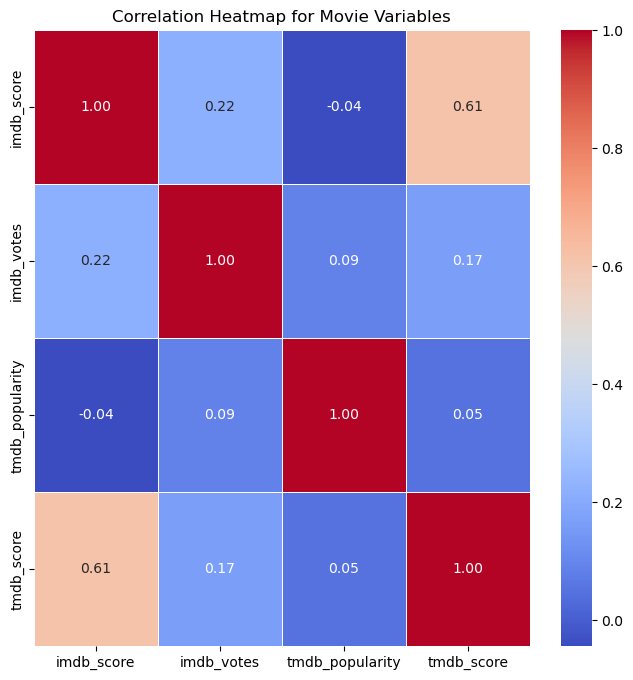

In [59]:
# Selecting only the movie variables
movie_variables = ['imdb_score', 'imdb_votes', 'tmdb_popularity', 'tmdb_score']

# Create a DataFrame with only the selected movie variables
movies_subset = movies[movie_variables]

# Create a correlation matrix
correlation_matrix = movies_subset.corr()

# Set up the matplotlib figure
plt.figure(figsize=(8, 8))

# Create a seaborn heatmap
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)

# Display the plot
plt.title('Correlation Heatmap for Movie Variables')
plt.show()


/var/folders/k7/96j2v32x5hzd0cnmry5y_j100000gn/T/ipykernel_69064/2102984101.py:3: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared.
  movies_subset.hist(ax = ax, color = 'maroon')


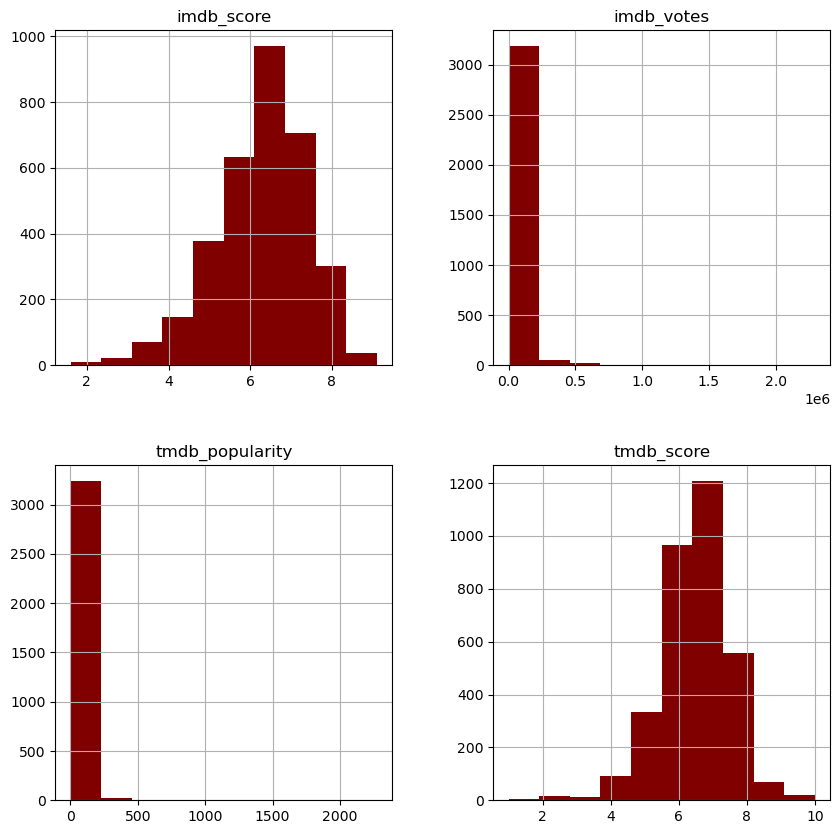

In [60]:
fig = plt.figure(figsize = (10, 10));
ax = fig.gca();
movies_subset.hist(ax = ax, color = 'maroon')
pass

#### Since tmdb_score vs. imdb_score and imdb_votes vs. tmdb_popularity variables don't seem too distinct, let's just stick with imdb_score as the scoring variable for movies and imdb_votes as a unique user's view of the movie. 

Referred to article to build a recommender system: https://medium.com/analytics-vidhya/simple-movie-recommender-system-with-correlation-coefficient-with-python-e6cb31dae01e



In [19]:
# creating a new index that can represent a unique user with votes, scores, etc. 

if 'User_ID' not in movies:
    movies.insert(0, 'User_ID', range(100, 100 + len(movies)))
    
movies.head()

,User_ID,movie_id,title,type,description,release_year,age_certification,runtime,genres,production_countries,imdb_id,imdb_score,imdb_votes,tmdb_popularity,tmdb_score
1,100,tm84618,Taxi Driver,MOVIE,A mentally unstable Vietnam War veteran works ...,1976,R,114,"['drama', 'crime']",['US'],tt0075314,8.2,808582.0,40.965,8.179
2,101,tm154986,Deliverance,MOVIE,Intent on seeing the Cahulawassee River before...,1972,R,109,"['drama', 'action', 'thriller', 'european']",['US'],tt0068473,7.7,107673.0,10.010,7.300
3,102,tm127384,Monty Python and the Holy Grail,MOVIE,"King Arthur, accompanied by his squire, recrui...",1975,PG,91,"['fantasy', 'action', 'comedy']",['GB'],tt0071853,8.2,534486.0,15.461,7.811
4,103,tm120801,The Dirty Dozen,MOVIE,12 American military prisoners in World War II...,1967,NaN,150,"['war', 'action']","['GB', 'US']",tt0061578,7.7,72662.0,20.398,7.600
6,104,tm70993,Life of Brian,MOVIE,"Brian Cohen is an average young Jewish man, bu...",1979,R,94,['comedy'],['GB'],tt0079470,8.0,395024.0,17.770,7.800


In [46]:
movies.tail()

,User_ID,movie_id,title,type,description,release_year,age_certification,runtime,genres,production_countries,imdb_id,imdb_score,imdb_votes,tmdb_popularity,tmdb_score
5836,3366,tm959213,My Amanda,MOVIE,Two unusually close friends share every aspect...,2021,NaN,89,"['drama', 'romance']",['PH'],tt13136084,5.7,308.0,2.908,5.7
5838,3367,tm1053409,Happiness Ever After,MOVIE,Five years later from where we left our charac...,2021,NaN,99,"['drama', 'romance']",['ZA'],tt14307890,4.2,163.0,11.536,7.3
5842,3368,tm1066324,Super Monsters: Once Upon a Rhyme,MOVIE,The Super Monsters rethink exemplary fantasies...,2021,NaN,25,"['animation', 'family']",[],tt14586752,5.6,38.0,53.762,6.3
5843,3369,tm1097142,My Bride,MOVIE,The story follows a young man and woman who go...,2021,NaN,93,"['romance', 'comedy', 'drama']",['EG'],tt14216488,5.0,327.0,2.545,5.3
5847,3370,tm1059008,Lokillo,MOVIE,A controversial TV host and comedian who has b...,2021,NaN,90,['comedy'],['CO'],tt14585902,3.8,68.0,26.005,6.3


### Recommendation System based on user's imdb_score
https://www.geeksforgeeks.org/recommendation-system-in-python/#

In [47]:
# Find Lowest and Highest rated movies:
mean_score = movies.groupby('movie_id')[['imdb_score']].mean()
# Lowest rated movies
lowest_rated = mean_score['imdb_score'].idxmin()
movies.loc[movies['movie_id'] == lowest_rated]
# Highest rated movies
highest_rated = mean_score['imdb_score'].idxmax()
movies.loc[movies['movie_id'] == highest_rated]
# show number of people who rated movies rated movie highest
movies[movies['movie_id']==highest_rated]
# show number of people who rated movies rated movie lowest
movies[movies['movie_id']==lowest_rated]

## the above movies has very low dataset. We will use bayesian average
movie_stats = movies.groupby('movie_id')[['imdb_score']].agg(['count', 'mean'])
movie_stats.columns = movie_stats.columns.droplevel()


In [48]:
# Now, we create user-item matrix using scipy csr matrix
from scipy.sparse import csr_matrix

def create_matrix(movies):
	
	N = len(movies['User_ID'].unique())
	M = len(movies['movie_id'].unique())
	
	# Map Ids to indices
	user_mapper = dict(zip(np.unique(movies["User_ID"]), list(range(N))))
	movie_mapper = dict(zip(np.unique(movies["movie_id"]), list(range(M))))
	
	# Map indices to IDs
	user_inv_mapper = dict(zip(list(range(N)), np.unique(movies["User_ID"])))
	movie_inv_mapper = dict(zip(list(range(M)), np.unique(movies["movie_id"])))
	
	user_index = [user_mapper[i] for i in movies['User_ID']]
	movie_index = [movie_mapper[i] for i in movies['movie_id']]

	X = csr_matrix((movies["imdb_score"], (movie_index, user_index)), shape=(M, N))
	
	return X, user_mapper, movie_mapper, user_inv_mapper, movie_inv_mapper
	
X, user_mapper, movie_mapper, user_inv_mapper, movie_inv_mapper = create_matrix(movies)

In [49]:
from sklearn.neighbors import NearestNeighbors

# Assuming your DataFrame is named 'movies' and 'X' is your feature matrix
# If not, replace 'movies' and 'X' with the actual names of your DataFrame and feature matrix

# Find similar movies using KNN
def find_similar_movies(movie_id, X, k, metric='cosine', show_distance=False):
    neighbour_ids = []

    if movie_id in movie_mapper:
        movie_ind = movie_mapper[movie_id]
        movie_vec = X[movie_ind]
        k += 1
        kNN = NearestNeighbors(n_neighbors=k, algorithm="brute", metric=metric)
        kNN.fit(X)
        movie_vec = movie_vec.reshape(1, -1)
        neighbour = kNN.kneighbors(movie_vec, return_distance=show_distance)
        for i in range(0, k):
            n = neighbour.item(i)
            neighbour_ids.append(movie_inv_mapper[n])
        neighbour_ids.pop(0)
    else:
        print(f"Movie ID {movie_id} not found.")
    
    return neighbour_ids

# Assuming 'movie_mapper' and 'movie_inv_mapper' are correctly defined
movie_titles = dict(zip(movies['movie_id'], movies['title']))

movie_id = 'tm1053409'

similar_ids = find_similar_movies(movie_id, X, k=10)
movie_title = movie_titles.get(movie_id, f"Movie ID {movie_id} not found.")

print(f"Since you watched {movie_title}")
for i in similar_ids:
    print(movie_titles.get(i, f"Movie ID {i} not found."))


Since you watched Happiness Ever After
Sakaling Maging Tayo
37 Seconds
Thackeray
Last Breath
Under the Eiffel Tower
Brother
Shikari
The Last Laugh
King of Boys
Petta


In [50]:
def recommend_movies_for_user(User_ID, X, user_mapper, movie_mapper, movie_inv_mapper, k=10):
	rec = movies[movies['User_ID'] == User_ID]
	
	if rec.empty:
		print(f"User with ID {User_ID} does not exist.")
		return

	movie_id = rec[rec['imdb_score'] == max(rec['imdb_score'])]['movie_id'].iloc[0]

	movie_titles = dict(zip(movies['movie_id'], movies['title']))

	similar_ids = find_similar_movies(movie_id, X, k)
	movie_title = movie_titles.get(movie_id, "Movie not found")

	if movie_title == "Movie not found":
		print(f"Movie with ID {movie_id} not found.")
		return

	print(f"Since you watched {movie_title}, you might also like:")
	for i in similar_ids:
		print(movie_titles.get(i, "Movie not found"))


In [51]:
User_ID = 180 # Replace with the desired user ID
recommend_movies_for_user(User_ID, X, user_mapper, movie_mapper, movie_inv_mapper, k=10)

Since you watched Titanic, you might also like:
37 Seconds
Thackeray
Last Breath
Sakaling Maging Tayo
Under the Eiffel Tower
King of Boys
Rattlesnake
Brother
Pinky Memsaab
Shikari


In [56]:
User_ID = 513 # Replace with the desired user ID
recommend_movies_for_user(User_ID, X, user_mapper, movie_mapper, movie_inv_mapper, k=10)

Since you watched Chhota Bheem Aur Krishna, you might also like:
Shikari
Last Breath
Sakaling Maging Tayo
37 Seconds
Petta
King of Boys
Ascharya Fuck It
Rattlesnake
Under the Eiffel Tower
Brother


In [41]:
# Years Released
movies_pery = movies.release_year.value_counts()

# transform object into df
movies_pery = pd.DataFrame(movies_pery)

In [42]:
movies_pery.rename(columns = {'release_year':'total_movies'}, inplace = True)

In [43]:
movies_pery.head()

,total_movies
2019,440
2018,431
2021,396
2020,396
2017,355


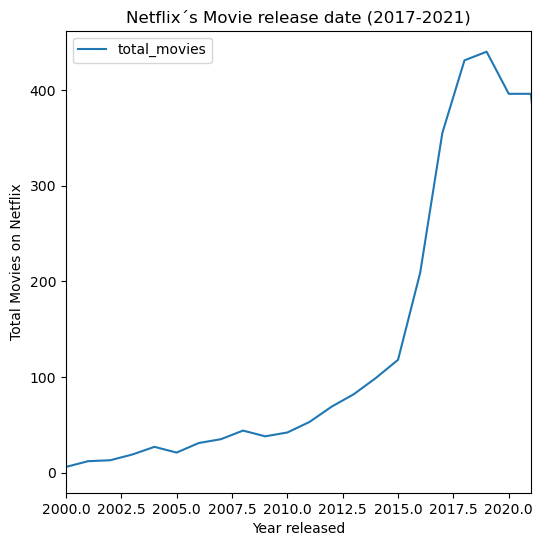

In [44]:
plt.figure(figsize=(6, 6))
sns.lineplot(data= movies_pery)
plt.title('Netflix´s Movie release date (2017-2021)')
plt.xlim(2000, 2021)
plt.xlabel('Year released')
plt.ylabel('Total Movies on Netflix')
plt.show()

In [45]:
max_movies = max(movies_pery.total_movies)

# Year with max value
#Find index with value: 
year_with_max_movies= movies_pery.index[movies_pery['total_movies'] == max_movies].tolist()

#temporary print
print (f' Most Netflix´s shows were released on: {year_with_max_movies} with a total of {max_movies} movies')

 Most Netflix´s shows were released on: [2019] with a total of 440 movies


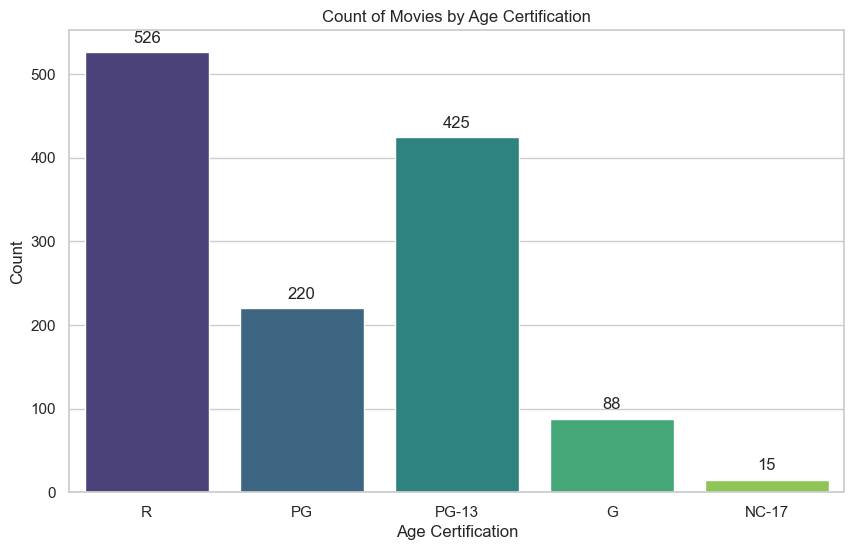

In [46]:
sns.set(style="whitegrid")

plt.figure(figsize=(10, 6))
b_moviecert = sns.countplot(x='age_certification', data=movies, palette='viridis')

#display count on each bar
for p in b_moviecert.patches:
    b_moviecert.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 10), textcoords='offset points')


# Add title and labels
plt.title('Count of Movies by Age Certification')
plt.xlabel('Age Certification')
plt.ylabel('Count')

# Display the plot
plt.show()

In [ ]:
sns.set(style="whitegrid")

plt.figure(figsize=(12, 6))
boxplot_imdb_by_age = sns.boxplot(x='age_certification', y='imdb_score', data=movies, palette='viridis')

# Add title and labels
plt.title('Box Plot of IMDb Scores by Age Certification')
plt.xlabel('Age Certification')
plt.ylabel('IMDb Score')

# Display the plot
plt.show()

In [ ]:
sns.set(style="whitegrid")

plt.figure(figsize=(12, 6))
boxplot_imdb_by_age = sns.boxplot(x='age_certification', y='tmdb_score', data=movies, palette='viridis')

# Add title and labels
plt.title('Box Plot of IMDb Scores by Age Certification')
plt.xlabel('Age Certification')
plt.ylabel('IMDb Score')

# Display the plot
plt.show()

In [ ]:
sns.set(style="whitegrid")

plt.figure(figsize=(10, 6))
b_movie_runtime = sns.countplot(x='runtime', data=movies, fill=True, palette='viridis')


# Add title and labels
plt.title('Count of Movies by Run Time')
plt.xlabel('Run Time')
plt.ylabel('Count')

# Display the plot
plt.show()

In [ ]:
# Create bins for runtime to make the graph a bit more cohesive

sns.set(style="whitegrid")

plt.figure(figsize=(10, 6))
b_movie_runtime = sns.histplot(x='runtime', data=movies, bins=20, kde=True, palette='viridis')

# Add title and labels
plt.title('Distribution of Movie Runtimes with Trendline')
plt.xlabel('Run Time')
plt.ylabel('Count')

# Display the plot
plt.show()


In [ ]:
plt.figure(figsize=(10, 5))
sns.scatterplot(x='runtime', y='imdb_score', data=movies)
plt.title('Scatter plot of imdb Score by Run Time')
plt.show()

In [ ]:
plt.figure(figsize=(10, 5))
sns.scatterplot(x='runtime', y='tmdb_score', data=movies)
plt.title('Scatter plot of tmdb Score by Run Time')
plt.show()

It seems like age_certification and runtime don't have the strongest correlation to a movie's imdb_score or tmdb_score.

#### Questions I'd like to answer that require more data cleaning/parsing:
- What's the most common genre?
- How does the movie's genre correlate with movie score and popularity?
- What's the most common production countries for movies?
- Which of the variables is the best predictor for high movie ratings? (Do we need to look into actors and producers from the credit tables?)

In [ ]:
prod_country = movies.production_countries.unique()
count_prod_country = movies.production_countries.nunique()
count_prod_country

# There's way too many unique production countries because there are multiple production companies. 
## We need a way to identify the main production country of a movie. 

In [ ]:
# sns.set(style="whitegrid")

# plt.figure(figsize=(10, 6))
# b_moviecountry = sns.countplot(x='production_countries', data=movies, palette='viridis')

# #display count on each bar
# for p in b_moviecountry.patches:
#     b_moviecountry.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 10), textcoords='offset points')

# # 
# # Add title and labels
# plt.title('Count of Movies by Production Country')
# plt.xlabel('Production Country')
# plt.ylabel('Count')

# # Display the plot
# plt.show()

In [ ]:
unique_genres = movies['genres'].unique()
unique_genre_count = movies['genres'].nunique()

print(unique_genres, unique_genre_count)

# Credits

In [ ]:
credits = pd.read_csv('../netflix/archive/credits.csv')

In [ ]:
credits.head()

In [ ]:
credits.info()

In [ ]:
credits.duplicated().sum()
# No duplicates

In [ ]:
role_types = credits['role'].unique()
role_types

#### Create separate table for actors & directors.

In [ ]:
actors = credits[credits['role'] == 'ACTOR']
actors.head()

In [ ]:
actors.isnull().sum()

In [ ]:
director = credits[credits['role'] == 'DIRECTOR']
director.head()

In [ ]:
director.isnull().sum()

There are null values for character name for actors and director, but it's not the most important information to have when determining popularity of a movie. 

### Let's merge the tables to see if featured actors and directors have a correlation with popularity of the movie. 

In [ ]:
movie_actors = pd.merge(movies, actors, on='id', how='inner')

movie_actors.head()

In [ ]:
movie_actors = movie_actors['name'].nunique()
movie_actors

In [ ]:
# Create a binary column indicating whether an actor is featured in a movie
movie_actors['actor_featured'] = movie_actors['name'].notnull().astype(int)

# Calculate the correlation coefficient between 'actor_featured' and 'tmdb_popularity'
correlation = movie_actors['actor_featured'].corr(movie_actors['tmdb_popularity'])

# Display the correlation coefficient
print(f"Correlation between actor presence and movie popularity: {correlation}")